In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
iris = sns.load_dataset('iris')

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
sc.fit(iris.drop('species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_features = sc.transform(iris.drop('species',axis=1))

In [21]:
iris_new = pd.DataFrame(scaled_features,columns=iris.columns[:-1])
iris_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris['species'],
                                                    test_size=0.30)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
pred = knn.predict(X_test)

In [62]:
pred

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [69]:
y_test.values

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [70]:
y_test.values == pred

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 16  2]
 [ 0  2 14]]


In [73]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.89      0.89      0.89        18
  virginica       0.88      0.88      0.88        16

avg / total       0.91      0.91      0.91        45



In [108]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

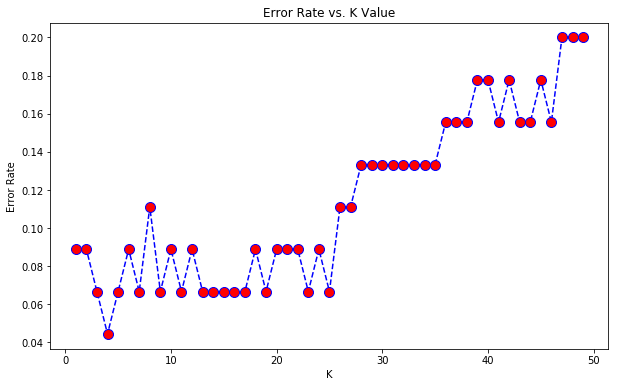

In [109]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [95]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [96]:
pred

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [97]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 18  0]
 [ 0  2 14]]


In [98]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.90      1.00      0.95        18
  virginica       1.00      0.88      0.93        16

avg / total       0.96      0.96      0.96        45



In [100]:
predall = knn.predict(iris_new)

In [101]:
print(confusion_matrix(iris['species'],predall))

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


In [102]:
print(classification_report(iris['species'],predall))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.91      0.98      0.94        50
  virginica       0.98      0.90      0.94        50

avg / total       0.96      0.96      0.96       150

